# Fraud Detection Data: EDA

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd

identity = pd.read_csv('train_identity.csv')
transaction = pd.read_csv('train_transaction.csv')

In [29]:
fraud_detection_df = pd.merge(transaction, identity, on='TransactionID', how='left')

fraud_detection_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


El dataset mostrado describe transacciones reales de comercio electrónico de Vesta y contienen una amplia gama
de características, desde el tipo de dispositivo hasta las características del producto. El objetivo principal es
mejorar la eficacia de las alertas de transacciones fraudulentas para millones de personas en todo el mundo,
ayudando a cientos de miles de empresas a reducir sus pérdidas por fraude y aumentar sus ingresos. Y, por
supuesto, ahorrará a muchas personas la molestia de los falsos positivos.

## conteo de datos faltantes

dado que hay muchas columnas, se crea entonces una función la cual recibe un dataframe y devuelve la cantidad de nulos y el conteo de filas por columna

In [30]:
def df_missing_summary(df):
    # Calculate the percentage of null values for each column
    null_percentage = df.isnull().mean() * 100

    # Calculate the total number of rows for each column
    total_rows = [len(df)] * len(df.columns)

    # Create a new DataFrame with the desired structure
    new_df = pd.DataFrame({
        'Column': df.columns.tolist() * 2,
        'Value': null_percentage.tolist() + total_rows
    })

    # Add a new index column to differentiate between percentage and total rows
    new_df['Type'] = ['Percentage Null'] * len(df.columns) + ['Total Rows'] * len(df.columns)

    # Pivot the DataFrame to get the desired format
    new_df = new_df.pivot(index='Type', columns='Column', values='Value')

    return new_df
 
missing_per_column = df_missing_summary(fraud_detection_df)

In [31]:
missing_per_column

Column,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,isFraud
Type,,,,,,,,,,,,,,,,,,,,,
Percentage Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.865411,76.245132,86.861855,87.589494,86.824771,76.126088,76.126088,76.126088,76.126088,0.0
Total Rows,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.0


la columna id_33 por ejemplo, tiene 87.58% de datos faltantes

In [32]:
missing_per_column[['id_33']]

Column,id_33
Type,
Percentage Null,87.589494
Total Rows,590540.000000


Una vez se tienen el porcentaje de datos faltantes por columna, se empieza a probar distintos umbrales, los umbrales son empleados para eliminar las columnas que estén por debajo de ese valor en porcentaje de datos faltantes.

Luego en cada paso, se comprueba cuantas columnas quedan en el dataset por cada umbral. Hasta llegar a un número de columnas razonable.

Originalmente, el número de columnas es:

In [33]:
len(missing_per_column.columns)

434

si se dejan solamente aquellas columnas con almenos el 70% de los datos

In [34]:
missing_per_column.T

Type,Percentage Null,Total Rows
Column,,
C1,0.000000,590540.0
C10,0.000000,590540.0
C11,0.000000,590540.0
C12,0.000000,590540.0
C13,0.000000,590540.0
...,...,...
id_35,76.126088,590540.0
id_36,76.126088,590540.0
id_37,76.126088,590540.0


In [35]:
len(missing_per_column.T[missing_per_column.T['Percentage Null'] <= 30])

202

Se reduce entonces de 434 a 202 eliminando columnas que tienen almenos el 70% de los datos totales

In [36]:
columns_left = missing_per_column.T[missing_per_column.T['Percentage Null'] <= 30].index

fraud_detection_df = fraud_detection_df[columns_left]

In [37]:
fraud_detection_df.isna().sum()

C1            0
C10           0
C11           0
C12           0
C13           0
           ... 
card3      1565
card4      1577
card5      4259
card6      1571
isFraud       0
Length: 202, dtype: int64

### cuantas columnas categóricas quedan?

In [38]:
categorical_columns = fraud_detection_df.select_dtypes(include=['object']).columns
num_categorical_columns = len(categorical_columns)

print(f"Number of categorical columns: {num_categorical_columns}")

Number of categorical columns: 5


cuales son esas columnas?

In [39]:
categorical_columns

Index(['M6', 'P_emaildomain', 'ProductCD', 'card4', 'card6'], dtype='object')

In [41]:
fraud_detection_df[['isFraud', 'M6', 'P_emaildomain', 'ProductCD', 'card4', 'card6']].head()

,isFraud,M6,P_emaildomain,ProductCD,card4,card6
0,0,T,NaN,W,discover,credit
1,0,T,gmail.com,W,mastercard,credit
2,0,F,outlook.com,W,visa,debit
3,0,F,yahoo.com,W,mastercard,debit
4,0,NaN,gmail.com,H,mastercard,credit


### Variables categóricas vs 'isFraud'

#### isFraud vs M6

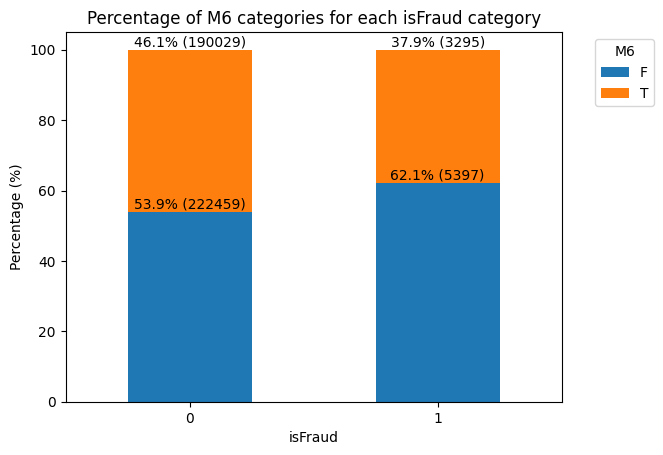

In [53]:
# Group the data by 'isFraud' and 'M6' and count the occurrences
fraud_m6_counts = fraud_detection_df.groupby(['isFraud', 'M6']).size().unstack(fill_value=0)

# Calculate the total counts per category (in this case, 'isFraud')
total_counts = fraud_m6_counts.sum(axis=1)

# Calculate the percentage of each 'M6' category for each 'isFraud' category
percentage_m6 = fraud_m6_counts.divide(total_counts, axis=0) * 100

# Plot the data using a stacked bar plot
ax = percentage_m6.plot(kind='bar', stacked=True)

plt.xlabel('isFraud')
plt.ylabel('Percentage (%)')
plt.title('Percentage of M6 categories for each isFraud category')
plt.legend(title='M6', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)

# Add percentage labels with counts in parenthesis next to the percentage in the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height
    count = fraud_m6_counts.iloc[i % 2, i // 2]  # Adjust indexing
    ax.annotate(f'{percentage:.1f}% ({count})', (x + width / 2, y + height + 1), ha='center')


aparentemente, la variable M6 indica que los valores no coinciden en las transacciones fraudulentas con mayor frecuencia que en las no fraudulentas

#### isFraud vs P_emaildomain

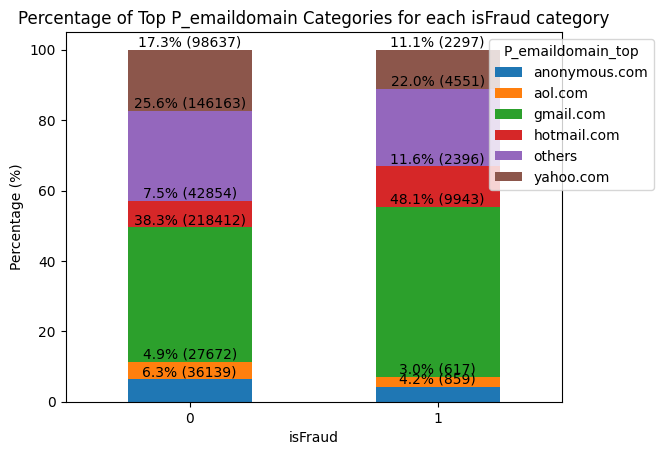

In [56]:
# Find the five most frequent categories in 'P_emaildomain'
top_email_domains = fraud_detection_df['P_emaildomain'].value_counts().nlargest(5).index

# Create a new column 'P_emaildomain_top' that includes only the top categories and groups the rest as 'others'
fraud_detection_df['P_emaildomain_top'] = fraud_detection_df['P_emaildomain'].where(fraud_detection_df['P_emaildomain'].isin(top_email_domains), 'others')

# Group the data by 'isFraud' and 'P_emaildomain_top' and count the occurrences
email_domain_counts = fraud_detection_df.groupby(['isFraud', 'P_emaildomain_top']).size().unstack(fill_value=0)

# Calculate the total counts per 'isFraud' category
total_counts = email_domain_counts.sum(axis=1)

# Calculate the percentage of each 'P_emaildomain_top' for each 'isFraud' category
percentage_email_domains = email_domain_counts.divide(total_counts, axis=0) * 100

# Plot the data using a stacked bar plot
ax = percentage_email_domains.plot(kind='bar', stacked=True)
plt.xlabel('isFraud')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Top P_emaildomain Categories for each isFraud category')
plt.legend(title='P_emaildomain_top', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)

# Add percentage labels with counts in parenthesis next to the percentage in the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height
    count = email_domain_counts.iloc[i % 2, i // 2]  # Adjust indexing
    ax.annotate(f'{percentage:.1f}% ({count})', (x + width / 2, y + height + 1), ha='center')

# Remove the temporary 'P_emaildomain_top' column
fraud_detection_df.drop('P_emaildomain_top', axis=1, inplace=True)


Se presentan ligeras variaciones en los dominios utilizados por tipos de transacción

#### isFraud vs ProductCD

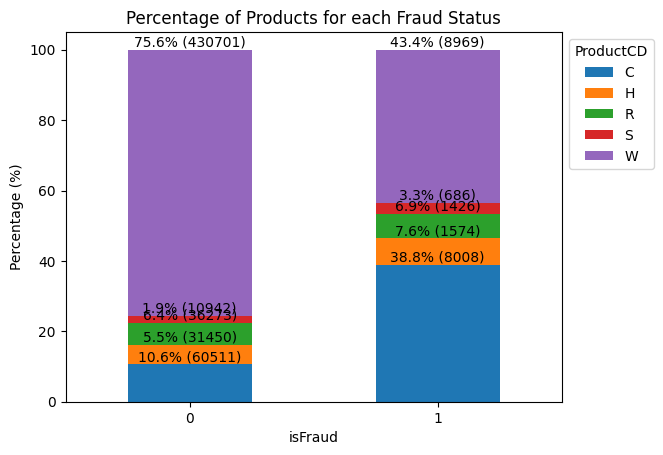

In [57]:
# Group the data by 'isFraud' and 'ProductCD' and count the occurrences
product_counts = fraud_detection_df.groupby(['isFraud', 'ProductCD']).size().unstack(fill_value=0)

# Calculate the total counts per category
total_counts = product_counts.sum(axis=1)

# Calculate the percentage of each product for each fraud status
percentage_products = product_counts.divide(total_counts, axis=0) * 100

# Plot the data using a stacked bar plot
ax = percentage_products.plot(kind='bar', stacked=True)
plt.xlabel('isFraud')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Products for each Fraud Status')
plt.legend(title='ProductCD', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)

# Add percentage labels with counts in parenthesis next to the percentage in the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height
    count = product_counts.iloc[i % 2, i // 2]  # Adjust indexing
    ax.annotate(f'{percentage:.1f}% ({count})', (x + width / 2, y + height + 1), ha='center')


con lo cuál se evidencia que el código de producto W es menos probable que genere una transacción Fraudulenta, siendo todo lo contrario con el códifo de producto C. Siendo esta una buena variable para modelar

#### isFraud vs card4

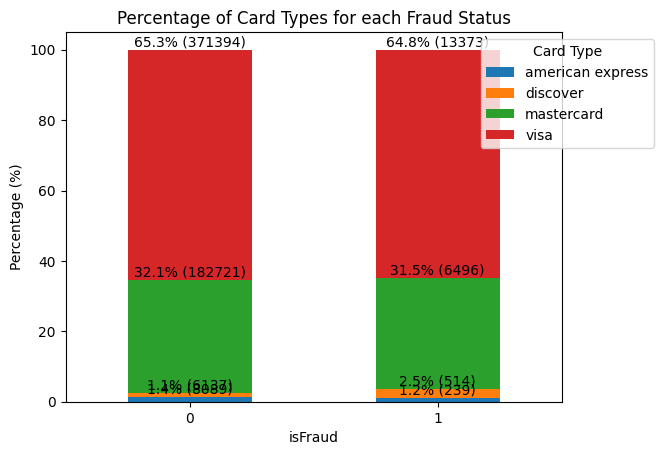

In [60]:
# Group the data by 'isFraud' and 'card4' and count the occurrences
card_counts = fraud_detection_df.groupby(['isFraud', 'card4']).size().unstack(fill_value=0)

# Calculate the total counts per category
total_counts = card_counts.sum(axis=1)

# Calculate the percentage of each card type for each fraud status
percentage_cards = card_counts.divide(total_counts, axis=0) * 100

# Plot the data using a stacked bar plot
ax = percentage_cards.plot(kind='bar', stacked=True)
plt.xlabel('isFraud')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Card Types for each Fraud Status')
plt.legend(title='Card Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)

# Add percentage labels with counts in parenthesis next to the percentage in the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height
    count = card_counts.iloc[i % 2, i // 2]  # Adjust indexing
    ax.annotate(f'{percentage:.1f}% ({count})', (x + width / 2, y + height + 1), ha='center')


la diferencia de proporciones de el tipo de tarjeta para cada categoría de fraude parece ser despreciable, por lo cual, a priori, esta variable no sería usada para modelar

#### isFraud vs card6

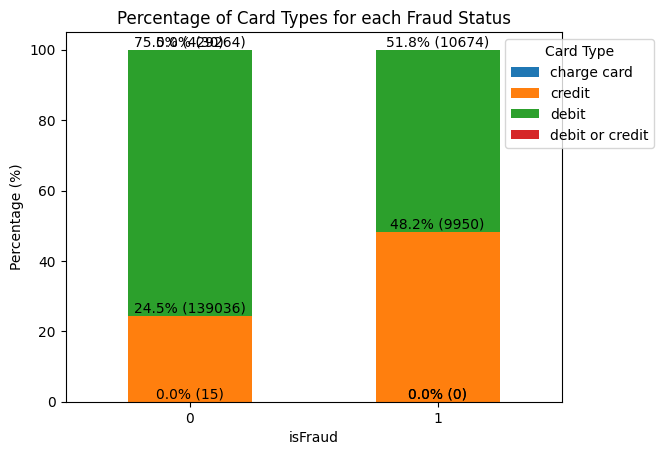

In [59]:
# Group the data by 'isFraud' and 'card6' and count the occurrences
card_counts = fraud_detection_df.groupby(['isFraud', 'card6']).size().unstack(fill_value=0)

# Calculate the total counts per category
total_counts = card_counts.sum(axis=1)

# Calculate the percentage of each card type for each fraud status
percentage_cards = card_counts.divide(total_counts, axis=0) * 100

# Plot the data using a stacked bar plot
ax = percentage_cards.plot(kind='bar', stacked=True)
plt.xlabel('isFraud')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Card Types for each Fraud Status')
plt.legend(title='Card Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)

# Add percentage labels with counts in parenthesis next to the percentage in the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height
    count = card_counts.iloc[i % 2, i // 2]  # Adjust indexing
    ax.annotate(f'{percentage:.1f}% ({count})', (x + width / 2, y + height + 1), ha='center')


aqui se evidencia que para las transacciones fraudulentas, se prefieren mucho las tarjetas de crédito, por lo cuál esa variable puede ser muy buena para modelar

### cuantas columnas numéricas quedan?

In [63]:
# Select columns of type int64 or float64, dropping the target variable
numeric_columns = fraud_detection_df.drop(columns='isFraud', axis = 1).select_dtypes(include=['int64', 'float64'])

# Count the number of selected columns
num_numeric_columns = numeric_columns.shape[1]

print(f"Number of numeric columns: {num_numeric_columns}")

Number of numeric columns: 196


### Variables numéricas vs isFraud

dado que hay tantas variables numéricas, entonces se hace el siguiente proceso:

- Se realiza un ANOVA test entre la variable 'isFraud' y todas las demás variables numéricas
- Se toman aquellas 10 variables cuyo p-valor es menor (porque son aquellas donde la diferencia es estadísticamente significativa y es mayor)
- Se visualizan en boxplots esas variables vs 'isFraud'

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway

# Step 1: Filter numerical columns
numerical_cols = fraud_detection_df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Perform ANOVA test and calculate p-values
p_values = {}
for col in numerical_cols:
    # Perform ANOVA test
    p_value = f_oneway(*[fraud_detection_df[col][fraud_detection_df['isFraud'] == category] for category in [0, 1]])[1]
    p_values[col] = p_value

# Step 3: Get 10 columns with the lowest p-values
top_10_cols = sorted(p_values, key=p_values.get)[:10]

# Step 4: Create a new dataframe with selected columns
selected_df = fraud_detection_df[['isFraud'] + top_10_cols]

selected_df

,isFraud,C2,C8,C12,C9,C5,C1,C4,C10,C7,C11
0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,5.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
4,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
590535,0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0
590536,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
590537,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
590538,0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0


Entonces, se evidencia que esas 10 variables cuya diferencia es estadísticamente significativa (y más significativa que todas las otras) para cada categoría de isFraud, corresponden a las variables C. 

<Figure size 1500x1000 with 0 Axes>

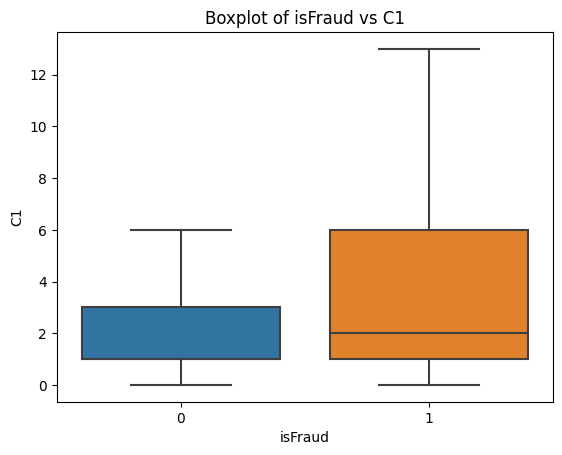

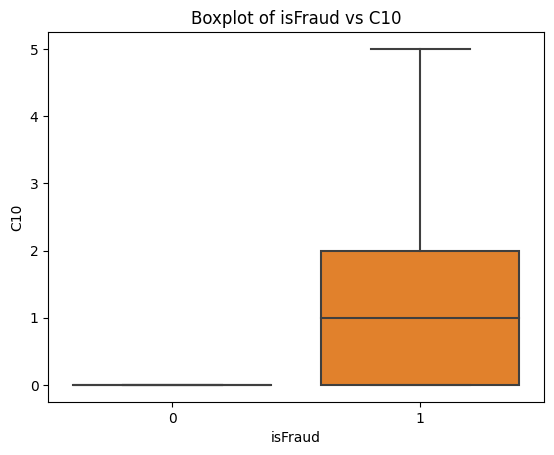

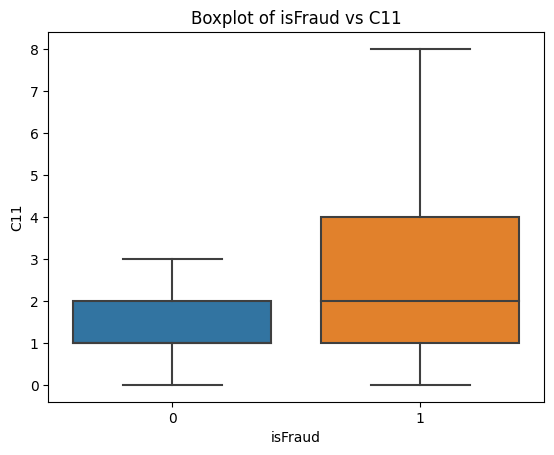

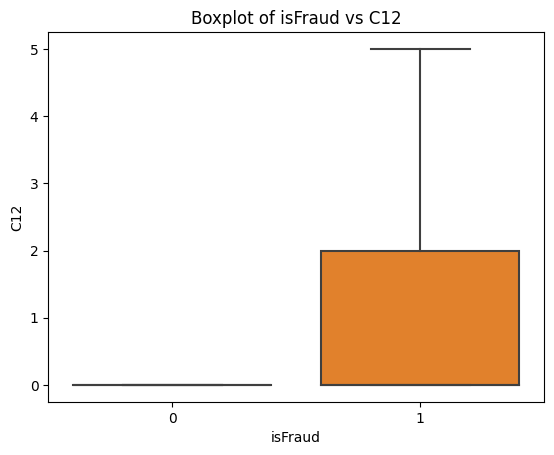

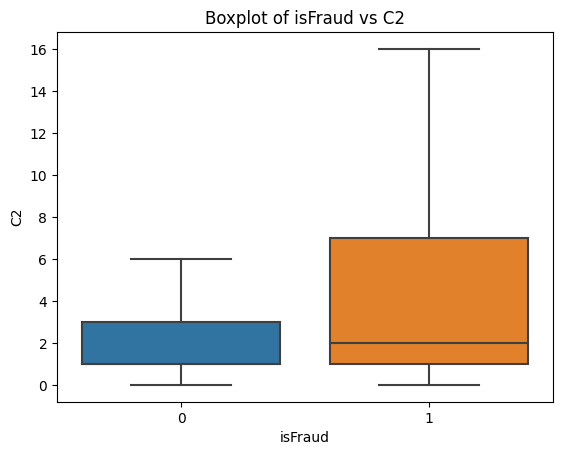

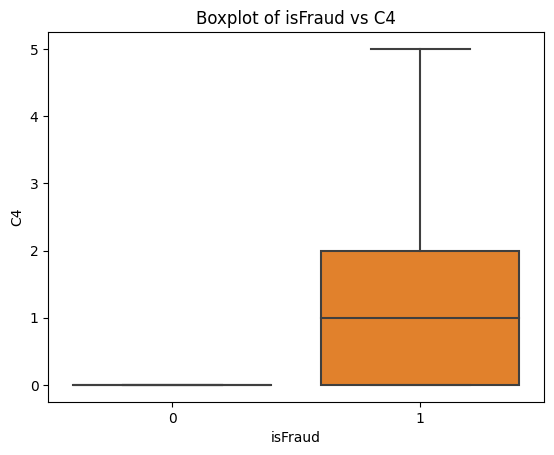

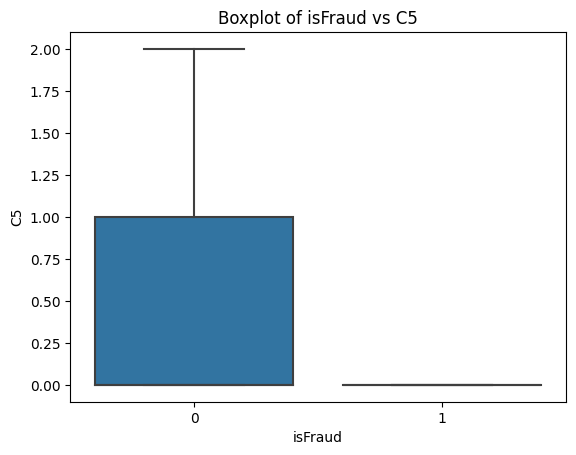

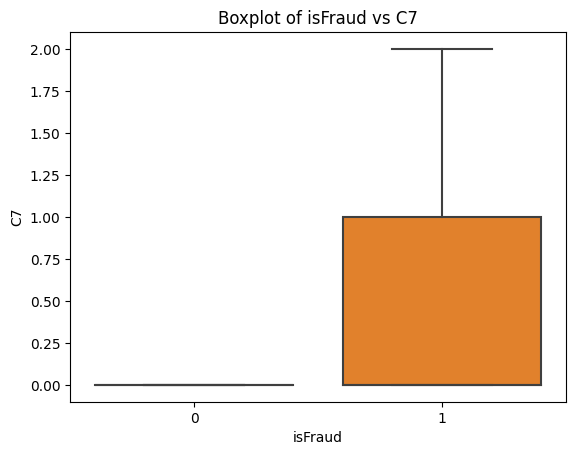

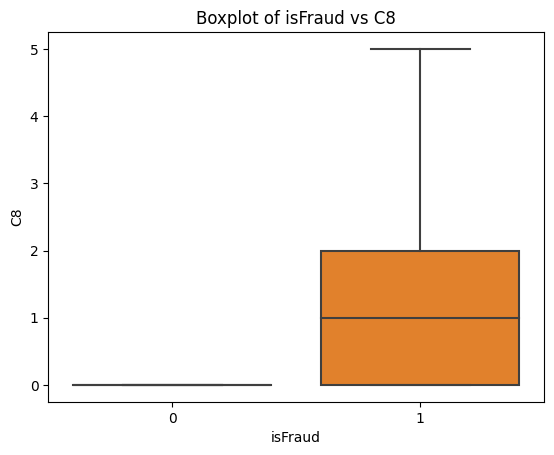

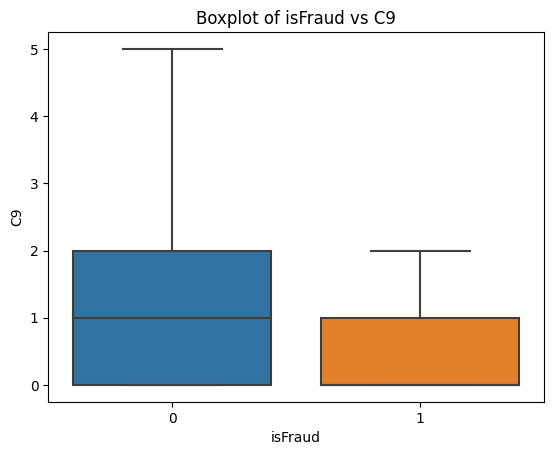

In [76]:
# Assuming 'isFraud' is a binary variable (0 or 1)
# You may need to adjust the size of the plot based on the number of variables
plt.figure(figsize=(15, 10))

# Loop through each column in the DataFrame (excluding 'isFraud')
for column in selected_df.columns.difference(['isFraud']):
    plt.figure()
    sns.boxplot(x='isFraud', y=column, data=selected_df, showfliers = False)
    plt.title(f'Boxplot of isFraud vs {column}')
    plt.show()


para algunas columnas, como C5, C7 y C8 se evidencia que todos los valores corresponden a cero en una categoría u otra.

La descripción de estas columnas es: C1-C14 : Recuento, cuántas direcciones se encuentran asociadas a la tarjeta de pago, etc. El significado
real está codificado.

C1-C14 : Recuento, cuántas direcciones se encuentran asociadas a la tarjeta de pago, etc. El significado real está codificado. por lo cuál no se presta para mayor interpretabilidad


## Eliminando multicolinealidad con Variance Inflation Factor (VIF)

Se realiza reducción de dimensionalidad por medio de eliminación de columnas altamente correlacionadas usando Variance Inflation Factor (VIF). Para esto se emplea la librería variance_inflation_factor().

Recordemos que:

- Un VIF ≥ 5 indica alta multicolinealidad entre la correspondiente variable independiente y las demás variables.

- Recomendación: Eliminar una columna a la vez. Aquella con el máximo VIF ≥ 5. Luego, para el nuevo dataframe, calcular nuevamente VIF e identificar nuevas columnas con VIF ≥ 5 máximo, y así sucesivamente hasta obtener solo valores de VIF < 5.

- Según corresponda, variables categóricas deben previamente codificarse usando por ejemplo OneHotEncoder().

el proceso codificado a continuación calcula el VIF para las variables y elimina aquella con mayor VIF hasta que todas queden con un valor de 5 o menos, tal como fué descrito este proceso devolverá las columnas numéricas aptas para empezar a entrenar el modelo, sin embargo, por temas de costo computacional, no logró ejecutarse por completo y no se pudo verificar la salida del mismo. Con un tiempo de ejecución superior (en este caso se esperó 6 horas) quizá logre completarse y mostrar las columnas correspondientes

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Identify numerical columns excluding 'isFraud' and object columns
numerical_columns = fraud_detection_df.select_dtypes(exclude=['object']).columns
numerical_columns = numerical_columns.drop('isFraud')

# Iteratively calculate and eliminate variables with VIF > 5
while True:
    vif_data = pd.DataFrame()
    vif_data["Variable"] = numerical_columns
    vif_data["VIF"] = [variance_inflation_factor(fraud_detection_df[numerical_columns].values, i) for i in range(len(numerical_columns))]

    # Check if any variable has VIF greater than 5
    max_vif = vif_data['VIF'].max()
    if max_vif > 5:
        # Remove variable with highest VIF
        remove_variable = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        numerical_columns = numerical_columns.drop(remove_variable)
        print(f"Removed variable '{remove_variable}' with VIF {max_vif}")
    else:
        break

# Display the final result
print("Final Variables:")
print(numerical_columns)
